In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # Stats Graphing
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py #graphing
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import squarify

from sklearn.preprocessing import LabelEncoder

In [90]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('Apartments.txt', low_memory=False)
df

,Apartkey,bill_code,category,AccountKey,Meter_Reads_2019,kWh_2019,Meter_Reads_2020,kWh_2020,Meter_Reads_2021,kWh_2021,Total_Meter_Reads,Total_kWh,Exclude_Reason,Neighbourhood,LANDUSE,ZONECAT,CensusTract,LandUseCategory,Manual Class Description,DecadeEffective,DecadeBuilt,Heating Type,SqrFeet,Apartment - Number of 1 Bedroom Units,Apartment - Number of 2 Bedroom Units,Apartment - Number of 3 Bedroom Units,Apartment - Number of 4 Bedroom Units,Apartment - Number of Bachelor Units,Apartment - Number of Units,Tenure,TypeofDwelling,Number_Utility_Accounts,Total_Building_kWh_2019,Total_Building_kWh_2020,Total_Building_kWh_2021,Total_Building_kwh
0,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881
1,-6657222023548652728,202,CR,506056515065204040,12,144680,12,140920,12,149240,36,434840,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,129600,76,12,6,0,0,94,20+ Years,Apartment Building,104,331320,361049,403713,1096082
2,-8405682908093506737,202,CR,5457954326361132362,12,61296,12,65244,12,56967,36,183507,NaN,BROW OF THE HILL,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330204.02,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1971 to 1980,1971 to 1980,Hot Water,59500,40,11,0,0,0,51,6-10 Years,Apartment Building,62,123878,144659,168842,437379
3,-3565632782321348274,202,CR,-4021344515998309819,12,168000,12,159960,12,155440,36,483400,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1971 to 1980,1971 to 1980,Hot Water,128700,61,35,0,0,11,107,20+ Years,Apartment Building,116,314242,331134,361654,1007030
4,1209222719095617605,202,CR,892029193087650369,12,39043,12,42800,12,43610,36,125453,NaN,BROW OF THE HILL,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330204.02,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1961 to 1970,1961 to 1970,Hot Water,62000,47,7,3,0,4,61,6-10 Years,Apartment Building,64,152883,166981,209034,528898
5,4907851228911117641,202,CR,8777328427632247617,12,13277,12,12759,12,14398,36,40434,NaN,UPTOWN,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330205.01,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1961 to 1970,1961 to 1970,Hot Water,14500,9,9,2,0,1,21,20+ Years,Apartment Building,24,37679,46535,60983,145197
6,-3288207152214988983,202,CR,-4827096312554696626,13,48950,12,49011,11,39557,36,137518,NaN,WESTEND,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330203.00,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1951 to 1960,1951 to 1960,Hot Water,28200,14,9,2,0,16,41,6-10 Years,Apartment Building,45,136192,145366,136817,418375
7,6362657902458591552,202,CR,-5869617169382120891,12,129600,12,133400,12,140160,36,403160,NaN,BROW OF THE HILL,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330204.02,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1961 to 1970,1961 to 1970,Hot Water,119100,49,59,0,0,0,108,6-10 Years,Apartment Building,120,299256,347128,416684,1063068
8,10500975287706702,202,CR,238285170966948935,12,21506,12,21750,12,20443,36,63699,NaN,BROW OF THE HILL,MF - APARTMENT BLOCK,APARTMENT (LOW RISE),9330204.02,MF - APARTMENT BLOCK,APARTMENT - OWNER PAYS HEAT,1961 to 1970,1961 to 1970,Hot Water,20800,19,2,2,0,2,25,5 or less years,Apartment Building,33,59483,68009,76843,204335
9,-7611592126648131253,202,CR,-2941593726665018810,13,91860,12,84900,12,85380,37,262140,NaN,VICTORY HEIGHTS,MF - HIGH RISE,APARTMENT (HIGH RISE),9330209.00,MF - HIGH RISE,APARTMENT - OWNER PAYS HEAT,1961 to 1970,1961 to 1970,Hot Water Radiant,56200,16,18,12,0,0,46,20+ Years,Apartment Building,46,198340,214015,247389,659744


In [24]:
print("(rows,columns) = " ,df.shape ,"\n","Data types:\n" ,df.dtypes)

(rows,columns) =  (80, 36) 
 Data types:
 Apartkey                                   int64
bill_code                                  int64
category                                  object
AccountKey                                 int64
Meter_Reads_2019                           int64
kWh_2019                                   int64
Meter_Reads_2020                           int64
kWh_2020                                   int64
Meter_Reads_2021                           int64
kWh_2021                                   int64
Total_Meter_Reads                          int64
Total_kWh                                  int64
Exclude_Reason                           float64
Neighbourhood                             object
LANDUSE                                   object
ZONECAT                                   object
CensusTract                              float64
LandUseCategory                           object
Manual Class Description                  object
DecadeEffective            

In [25]:
missing_data = df.isnull()
missing_data

,Apartkey,bill_code,category,AccountKey,Meter_Reads_2019,kWh_2019,Meter_Reads_2020,kWh_2020,Meter_Reads_2021,kWh_2021,Total_Meter_Reads,Total_kWh,Exclude_Reason,Neighbourhood,LANDUSE,ZONECAT,CensusTract,LandUseCategory,Manual Class Description,DecadeEffective,DecadeBuilt,Heating Type,SqrFeet,Apartment - Number of 1 Bedroom Units,Apartment - Number of 2 Bedroom Units,Apartment - Number of 3 Bedroom Units,Apartment - Number of 4 Bedroom Units,Apartment - Number of Bachelor Units,Apartment - Number of Units,Tenure,TypeofDwelling,Number_Utility_Accounts,Total_Building_kWh_2019,Total_Building_kWh_2020,Total_Building_kWh_2021,Total_Building_kwh
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Apartkey
False    80
Name: Apartkey, dtype: int64

bill_code
False    80
Name: bill_code, dtype: int64

category
False    80
Name: category, dtype: int64

AccountKey
False    80
Name: AccountKey, dtype: int64

Meter_Reads_2019
False    80
Name: Meter_Reads_2019, dtype: int64

kWh_2019
False    80
Name: kWh_2019, dtype: int64

Meter_Reads_2020
False    80
Name: Meter_Reads_2020, dtype: int64

kWh_2020
False    80
Name: kWh_2020, dtype: int64

Meter_Reads_2021
False    80
Name: Meter_Reads_2021, dtype: int64

kWh_2021
False    80
Name: kWh_2021, dtype: int64

Total_Meter_Reads
False    80
Name: Total_Meter_Reads, dtype: int64

Total_kWh
False    80
Name: Total_kWh, dtype: int64

Exclude_Reason
True    80
Name: Exclude_Reason, dtype: int64

Neighbourhood
False    80
Name: Neighbourhood, dtype: int64

LANDUSE
False    80
Name: LANDUSE, dtype: int64

ZONECAT
False    80
Name: ZONECAT, dtype: int64

CensusTract
False    80
Name: CensusTract, dtype: int64

LandUseCategory
False    80
Name: La

## Total electricity consumption (SFD+Apartments)

In [353]:
# Appending aprtment usage data with apartments data on basis of "Apartkey"
df1 = pd.read_csv('Apartments.txt', low_memory=False)
df2 = pd.read_csv('Apartment_Usage.txt', low_memory=False)
df3 = pd.merge(df1, df2, on='Apartkey')
df3.rename(columns={'Heating Type': 'Heating_Type'}, inplace=True)
df3.head(100)




,Apartkey,bill_code,category,AccountKey_x,Meter_Reads_2019,kWh_2019,Meter_Reads_2020,kWh_2020,Meter_Reads_2021,kWh_2021,Total_Meter_Reads,Total_kWh,Exclude_Reason,Neighbourhood,LANDUSE,ZONECAT,CensusTract,LandUseCategory,Manual Class Description,DecadeEffective,DecadeBuilt,Heating_Type,SqrFeet,Apartment - Number of 1 Bedroom Units,Apartment - Number of 2 Bedroom Units,Apartment - Number of 3 Bedroom Units,Apartment - Number of 4 Bedroom Units,Apartment - Number of Bachelor Units,Apartment - Number of Units,Tenure,TypeofDwelling,Number_Utility_Accounts,Total_Building_kWh_2019,Total_Building_kWh_2020,Total_Building_kWh_2021,Total_Building_kwh,MeterKey,AccountKey_y,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-01-22 00:00:00,460,1,NaN,NaN
1,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-03-25 00:00:00,466,2,62.0,7.0
2,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-05-21 00:00:00,370,3,57.0,6.0
3,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-07-22 00:00:00,401,4,62.0,6.0
4,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-09-23 00:00:00,310,5,63.0,4.0
5,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2019-11-22 00:00:00,389,6,60.0,6.0
6,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2020-01-21 00:00:00,493,1,60.0,8.0
7,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2020-03-20 00:00:00,358,2,59.0,6.0
8,-6815777949959864761,202,CR,207106523809576260,12,0,12,0,12,30,36,30,NaN,UPTOWN,MF - HIGH RISE,APARTMENT (HIGH RISE),9330205.02,MF - HIGH RISE,APARTMENT (HIGH RISE),1961 to 1970,1961 to 1970,Hot Water,105600,40,43,3,0,0,86,11-15 Years,Apartment Building,94,311437,334743,378701,1024881,-9086095853333343923,-958544883416535229,2020-05-21 00:00:0

In [246]:
# slicing the df3 with common columns to later combine it with buling data
df4 = df3[["Read_Date","KWH", "Bill_Number_for_Year", "Billing_Period_Days","Avg_kWh_per_Day"]]
df4

,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,2019-01-22 00:00:00,460,1,NaN,NaN
1,2019-03-25 00:00:00,466,2,62.0,7.0
2,2019-05-21 00:00:00,370,3,57.0,6.0
3,2019-07-22 00:00:00,401,4,62.0,6.0
4,2019-09-23 00:00:00,310,5,63.0,4.0
...,...,...,...,...,...
57301,2021-04-15 00:00:00,64,1,NaN,NaN
57302,2021-06-10 00:00:00,426,2,56.0,7.0
57303,2021-08-17 00:00:00,579,3,68.0,8.0
57304,2021-10-14 00:00:00,500,4,58.0,8.0


In [260]:
# Appending SFD usage data with SFD data on basis of "AccountKey"
df5 = pd.read_csv('SFD.txt', low_memory=False)
df6 = pd.read_csv('SFD_Usage.txt', low_memory=False)
df7 = pd.merge(df5, df6, on='AccountKey')
df7.head(100)


,PropKey,AccountKey,tenant_owner,bill_code,start_date,end_date,Meter_Reads_2019,kWh_2019,Meter_Reads_2020,kWh_2020,Meter_Reads_2021,kWh_2021,Total_Meter_Reads,Total_kWh,category,NGBRHOOD,ZONECAT,CensusTract,DecadeEffective,DecadeBuilt,Foundation,Heating_Type,Sqrfeet,Number_of_2Piece_Baths,Number_of_3Piece_Baths,Number_of_Full_Baths,Number_of_Bedrooms,Number_of_Storeys,Pool,Tenure,TypeofDwelling,BuildingKey,Storey_Desc,Build,MeterKey,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-01-28,597,1,NaN,NaN
1,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-03-28,358,2,59.0,6.0
2,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-05-28,384,3,61.0,6.0
3,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-07-23,454,4,56.0,8.0
4,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-10-01,611,5,70.0,8.0
5,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2019-11-27,468,6,57.0,8.0
6,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2020-01-29,412,1,63.0,6.0
7,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2020-03-24,407,2,55.0,7.0
8,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2020-05-25,644,3,62.0,10.0
9,4812083466761064011,-7964294192930844083,T,101,10/16/2013 0:00:00,NaN,6,2872,6,3367,6,2820,18,9059,RE,DOWNTOWN,APARTMENT (HIGH RISE),9330207.0,1971 to 1980,1971 to 1980,NaN,NaN,1000,0,0,1,2,0.0,NaN,6-10 Years,CONDO,6.270876e+18,NaN,HI-RISE,1374756790930248257,2020-07-28,539,4,64.0,8.0


In [261]:
#Slicing df7 to combine it with the SFD data
df8 = df7[["Read_Date","KWH", "Bill_Number_for_Year", "Billing_Period_Days","Avg_kWh_per_Day"]]
df8

,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,2019-01-28,597,1,NaN,NaN
1,2019-03-28,358,2,59.0,6.0
2,2019-05-28,384,3,61.0,6.0
3,2019-07-23,454,4,56.0,8.0
4,2019-10-01,611,5,70.0,8.0
...,...,...,...,...,...
285796,2021-03-11,239,2,57.0,4.0
285797,2021-05-11,252,3,61.0,4.0
285798,2021-07-07,256,4,57.0,4.0
285799,2021-09-10,296,5,65.0,4.0


In [263]:
#Combinig both buiding and SFD data
df9 = pd.concat([df4, df8], axis=0)
df9

,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,2019-01-22 00:00:00,460,1,NaN,NaN
1,2019-03-25 00:00:00,466,2,62.0,7.0
2,2019-05-21 00:00:00,370,3,57.0,6.0
3,2019-07-22 00:00:00,401,4,62.0,6.0
4,2019-09-23 00:00:00,310,5,63.0,4.0
...,...,...,...,...,...
285796,2021-03-11,239,2,57.0,4.0
285797,2021-05-11,252,3,61.0,4.0
285798,2021-07-07,256,4,57.0,4.0
285799,2021-09-10,296,5,65.0,4.0


In [60]:
#Eliminating the missing values
missing_data = df3.isnull()


for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Apartkey
False    57306
Name: Apartkey, dtype: int64

bill_code
False    57306
Name: bill_code, dtype: int64

category
False    57306
Name: category, dtype: int64

AccountKey_x
False    57306
Name: AccountKey_x, dtype: int64

Meter_Reads_2019
False    57306
Name: Meter_Reads_2019, dtype: int64

kWh_2019
False    57306
Name: kWh_2019, dtype: int64

Meter_Reads_2020
False    57306
Name: Meter_Reads_2020, dtype: int64

kWh_2020
False    57306
Name: kWh_2020, dtype: int64

Meter_Reads_2021
False    57306
Name: Meter_Reads_2021, dtype: int64

kWh_2021
False    57306
Name: kWh_2021, dtype: int64

Total_Meter_Reads
False    57306
Name: Total_Meter_Reads, dtype: int64

Total_kWh
False    57306
Name: Total_kWh, dtype: int64

Exclude_Reason
True    57306
Name: Exclude_Reason, dtype: int64

Neighbourhood
False    57306
Name: Neighbourhood, dtype: int64

LANDUSE
False    57306
Name: LANDUSE, dtype: int64

ZONECAT
False    57306
Name: ZONECAT, dtype: int64

CensusTract
False    57306
Name: CensusTr

In [264]:
#seggregating the date columns to date, day and year columns for plotting convinience.
df9["Read_Date"] = pd.to_datetime(df9["Read_Date"],format='%Y-%m-%d')

df9 = df9.sort_values(by="Read_Date")
df9.reset_index()

,index,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day
0,10632,2019-01-03,2048,1,NaN,NaN
1,60230,2019-01-03,1836,1,NaN,NaN
2,60193,2019-01-03,1171,1,NaN,NaN
3,15178,2019-01-03,4286,1,NaN,NaN
4,113631,2019-01-03,1513,1,NaN,NaN
...,...,...,...,...,...,...
343102,173843,2021-12-31,5505,6,65.0,84.0
343103,173824,2021-12-31,4943,6,65.0,76.0
343104,173787,2021-12-31,7626,6,65.0,117.0
343105,173919,2021-12-31,3848,6,65.0,59.0


In [265]:
print (df9["Read_Date"].value_counts())

2021-07-26    1644
2020-03-23    1500
2019-09-25    1460
2021-11-23    1450
2021-04-14    1364
2019-03-25    1356
2021-12-10    1326
2019-07-10    1309
2021-10-20    1305
2019-11-25    1305
2019-08-12    1281
2021-01-25    1262
2020-08-18    1255
2021-07-22    1233
2019-05-23    1227
2019-07-29    1221
2020-11-23    1215
2020-01-13    1208
2021-01-13    1202
2019-01-24    1197
2021-05-25    1197
2020-11-25    1197
2019-05-28    1169
2020-06-15    1168
2019-11-22    1156
2021-11-25    1153
2020-02-11    1138
2021-09-23    1127
2020-04-16    1100
2020-09-24    1091
2019-07-22    1089
2019-05-09    1087
2021-06-09    1086
2020-05-25    1084
2019-03-11    1083
2021-03-22    1079
2020-06-10    1078
2020-05-21    1062
2019-10-17    1056
2019-01-28    1054
2020-03-24    1047
2021-02-09    1044
2020-09-25    1035
2019-03-26    1035
2020-07-21    1031
2021-09-27    1029
2019-03-29    1024
2021-04-13    1021
2021-12-08    1015
2020-01-29    1010
2021-03-10    1005
2019-01-29    1002
2020-03-10  

In [266]:
df9['Year'] = df9['Read_Date'].dt.year
df9['Month'] = df9['Read_Date'].dt.month_name(locale = 'English')
df9['Day'] = df9['Read_Date'].dt.day
df9.head(4000)

,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day,Year,Month,Day
10632,2019-01-03,2048,1,NaN,NaN,2019,January,3
60230,2019-01-03,1836,1,NaN,NaN,2019,January,3
60193,2019-01-03,1171,1,NaN,NaN,2019,January,3
15178,2019-01-03,4286,1,NaN,NaN,2019,January,3
113631,2019-01-03,1513,1,NaN,NaN,2019,January,3
113830,2019-01-03,639,1,NaN,NaN,2019,January,3
191634,2019-01-04,1228,1,NaN,NaN,2019,January,4
174659,2019-01-04,1459,1,NaN,NaN,2019,January,4
174641,2019-01-04,4328,1,NaN,NaN,2019,January,4
174623,2019-01-04,3485,1,NaN,NaN,2019,January,4


In [268]:
# Eliminating NaN from Avg_kWh_per_Day column
df10 = df9[df9['Avg_kWh_per_Day'].notna()]
print (df9["Month"].value_counts())
df10.head(500)

July         31594
March        31341
January      31227
May          30453
November     29898
September    29523
October      28034
December     27204
June         26906
August       26116
February     25532
April        25279
Name: Month, dtype: int64


,Read_Date,KWH,Bill_Number_for_Year,Billing_Period_Days,Avg_kWh_per_Day,Year,Month,Day
113433,2019-01-25,265,2,7.0,37.0,2019,January,25
60194,2019-01-28,1049,2,25.0,41.0,2019,January,28
60231,2019-01-28,1073,2,25.0,42.0,2019,January,28
113632,2019-01-28,1037,2,25.0,41.0,2019,January,28
113831,2019-01-28,409,2,25.0,16.0,2019,January,28
10633,2019-01-28,1055,2,25.0,42.0,2019,January,28
15179,2019-01-28,2887,2,25.0,115.0,2019,January,28
174066,2019-01-29,768,2,25.0,30.0,2019,January,29
36470,2019-01-29,6596,2,25.0,263.0,2019,January,29
174678,2019-01-29,183,2,25.0,7.0,2019,January,29


In [312]:
# Performing group by and sum
df11 = df10.groupby(['Year','Month'])['Avg_kWh_per_Day'].sum().reset_index()

In [313]:
# Sorting the datset according to months
Month = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
df11['Month'] = pd.Categorical(df11['Month'], categories=Month, ordered=True)
df11 = df11.sort_values(by='Month')
df11

,Year,Month,Avg_kWh_per_Day
4,2019,January,2254.0
16,2020,January,253204.0
28,2021,January,245294.0
3,2019,February,26224.0
15,2020,February,210573.0
27,2021,February,231481.0
31,2021,March,272093.0
7,2019,March,243855.0
19,2020,March,250349.0
0,2019,April,179489.0


Text(0, 0.5, 'Sum of Avg_kWh_per_Day')

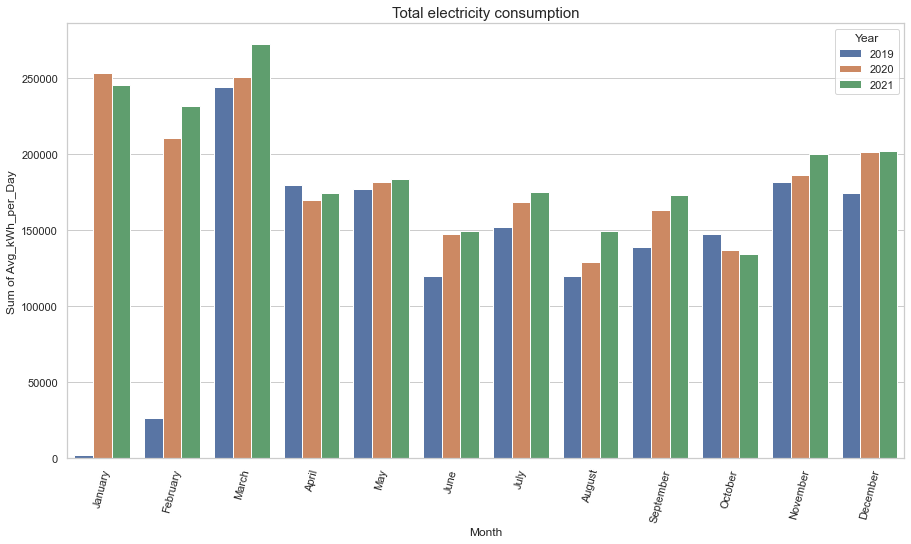

In [315]:
#plotting
plt.figure(figsize=(15, 8))
splot = sns.barplot(x="Month", y="Avg_kWh_per_Day",hue ="Year" ,data=df11)
splot.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=75)
plt.title('Total electricity consumption',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Sum of Avg_kWh_per_Day')

### What is the average electricity usage for different types of housing?

In [354]:
df_s =df7[["TypeofDwelling",'ZONECAT',"Tenure","Heating_Type","KWH","Avg_kWh_per_Day"]]
df_a =df3[["TypeofDwelling",'ZONECAT',"Tenure","Heating_Type","KWH","Avg_kWh_per_Day"]]
df_td = pd.concat([df_s, df_a], axis=0)
df_td

,TypeofDwelling,ZONECAT,Tenure,Heating_Type,KWH,Avg_kWh_per_Day
0,CONDO,APARTMENT (HIGH RISE),6-10 Years,NaN,597,NaN
1,CONDO,APARTMENT (HIGH RISE),6-10 Years,NaN,358,6.0
2,CONDO,APARTMENT (HIGH RISE),6-10 Years,NaN,384,6.0
3,CONDO,APARTMENT (HIGH RISE),6-10 Years,NaN,454,8.0
4,CONDO,APARTMENT (HIGH RISE),6-10 Years,NaN,611,8.0
...,...,...,...,...,...,...
57301,Apartment Building,APARTMENT (LOW RISE),5 or less years,Hot Water,64,NaN
57302,Apartment Building,APARTMENT (LOW RISE),5 or less years,Hot Water,426,7.0
57303,Apartment Building,APARTMENT (LOW RISE),5 or less years,Hot Water,579,8.0
57304,Apartment Building,APARTMENT (LOW RISE),5 or less years,Hot Water,500,8.0


In [329]:
df_td["TypeofDwelling"].value_counts()

CONDO                 158372
SINGLE FAMILY         108069
Apartment Building     57306
TOWNHOUSE              19360
Name: TypeofDwelling, dtype: int64

In [330]:
#df7["Build"].value_counts()

In [331]:
df = df_td.groupby(['TypeofDwelling'])['Avg_kWh_per_Day'].mean().reset_index()
#df = df7.groupby(['TypeofDwelling','Build'])['Avg_kWh_per_Day'].mean().reset_index()

In [332]:
df
df.style.bar(subset=['Avg_kWh_per_Day'], color='#d65f5f')

,TypeofDwelling,Avg_kWh_per_Day
0,Apartment Building,16.513673
1,CONDO,13.403862
2,SINGLE FAMILY,27.817506
3,TOWNHOUSE,23.758334


In [333]:
df = df_td.groupby(['ZONECAT'])['Avg_kWh_per_Day'].mean().reset_index()
df
df.style.bar(subset=['Avg_kWh_per_Day'], color='#d65f5f')

,ZONECAT,Avg_kWh_per_Day
0,APARTMENT (HIGH RISE),14.588562
1,APARTMENT (LOW RISE),14.075016
2,COMMERCIAL,17.068269
3,DUPLEX,26.402317
4,INDUSTRIAL,28.452555
5,INSTITUTIONAL,18.453505
6,MIXED,16.966051
7,SINGLE DETACHED,28.059757
8,TOWNHOUSE,24.054781


### New Westminster has numerous heritage homes and building standards have changed over time. How does the age of a home relate to electricity usage?


In [335]:
df = df_td.groupby(['Tenure'])['Avg_kWh_per_Day'].mean().reset_index()
df
df.style.bar(subset=['Avg_kWh_per_Day'], color='#d65f5f')

,Tenure,Avg_kWh_per_Day
0,11-15 Years,19.925652
1,16-20 Years,19.174802
2,20+ Years,19.373201
3,5 or less years,18.091871
4,6-10 Years,18.990523


### The most efficient heating type

In [356]:
df = df_td.groupby(['Heating_Type'])['Avg_kWh_per_Day'].mean().reset_index()
df
df.style.bar(subset=['Avg_kWh_per_Day'], color='#d65f5f')

,Heating_Type,Avg_kWh_per_Day
0,Electric,26.936027
1,Electric Wall,31.784946
2,Forced Air Unit,31.450413
3,Hot Water,14.225722
4,Hot Water Radiant,19.296738


In [358]:
df = pd.read_csv('Apartments.txt', low_memory=False)
df['Heating Type'].value_counts()

Hot Water            55
Hot Water Radiant    19
Electric              2
Forced Air Unit       1
Electric Wall         1
Name: Heating Type, dtype: int64